In [1]:
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
stopwords = [ "a", "about", "above", "after", "again", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [2]:
len(stopwords)

152

In [3]:
import tensorflow as tf


In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('train.csv')

In [6]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
d=pd.read_csv('test.csv')

In [8]:
d.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [15]:
sentences = []
labels=[]

In [16]:
#REMOVING THE STOPWORDS PRESENT IN THE TWEETS
with open("train.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        
        labels.append(int(row[4]))
        sentence = row[3]
        for word in stopwords:
            token =" "+word+" "
            sentence = sentence.replace(token," ")
            sentence = sentence.replace(" "," ")
        sentences.append(sentence)


print(len(sentences))
print(sentences[0:5])

7613
['Our Deeds Reason #earthquake May ALLAH Forgive us all', 'Forest fire near La Ronge Sask. Canada', "All residents asked 'shelter place' notified officers. No evacuation shelter place orders expected", '13,000 people receive #wildfires evacuation orders California ', 'Just got sent photo Ruby #Alaska smoke #wildfires pours school ']


In [17]:
type(labels)

list

In [19]:
import numpy as np

In [20]:
labels=np.array(labels)

In [21]:
print(labels)

[1 1 1 ... 1 1 1]


In [91]:
#for test data
tsentences = []
#labels = []
with open("test.csv", 'r') as csvfile:
    treader = csv.reader(csvfile, delimiter=',')
    next(treader)
    for row in treader:
        #labels.append(row[4])
        tsentence = row[3]
        for word in stopwords:
            token = " " + word + " "
            tsentence = tsentence.replace(token, " ")
            tsentence = tsentence.replace("  ", " ")
        tsentences.append(tsentence)


print(len(tsentences))
print(tsentences[0])

3263
Just happened terrible car crash


In [23]:
training_sentences=sentences[0:5000]
testing_sentences=sentences[5000:]

In [24]:
print(training_sentences[0])

Our Deeds Reason #earthquake May ALLAH Forgive us all


In [25]:
print(testing_sentences[0])

13 reasons love women military   - lulgzimbestpicts http://t.co/IAPvTqxLht http://t.co/WAMKRe6CKD


In [26]:
training_labels=labels[0:5000]
testing_labels=labels[5000:]

In [27]:
#WORD EMBEDDING
vocab_size = 5000
embedding_dim = 80
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [92]:
#WORD EMBEDDING FOR TEST DATA
vocab_size = 1000
embedding_dim = 32
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(tsentences)
tword_index = tokenizer.word_index
tsequences = tokenizer.texts_to_sequences(tsentences)
tpadded = pad_sequences(tsequences,maxlen=max_length, truncating=trunc_type)


In [28]:
print(len(sentences))

7613


In [29]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3) ##EARLY STOPPING

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),  ##RNN MODEL 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 80)           400000    
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 128)          74240     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 523,905
Trainable params: 523,905
Non-trainable params: 0
_________________________________________________________________


In [109]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(14, activation='relu'),     ## WITHOUT RNN ( JUST DEEP NEURAL NETWORK)
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [30]:
num_epochs = 10
history=model.fit(padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/10
157/157 [==============================] - 39s 246ms/step - loss: 0.5542 - accuracy: 0.7102 - val_loss: 0.4745 - val_accuracy: 0.7826
Epoch 2/10
157/157 [==============================] - 36s 229ms/step - loss: 0.3446 - accuracy: 0.8616 - val_loss: 0.5214 - val_accuracy: 0.7761
Epoch 3/10
157/157 [==============================] - 36s 232ms/step - loss: 0.2579 - accuracy: 0.9042 - val_loss: 0.5667 - val_accuracy: 0.7352
Epoch 4/10
157/157 [==============================] - 37s 235ms/step - loss: 0.1977 - accuracy: 0.9288 - val_loss: 0.6462 - val_accuracy: 0.7344
Epoch 5/10
157/157 [==============================] - 35s 226ms/step - loss: 0.1460 - accuracy: 0.9488 - val_loss: 0.8890 - val_accuracy: 0.7298
Epoch 6/10
157/157 [==============================] - 36s 232ms/step - loss: 0.1125 - accuracy: 0.9558 - val_loss: 1.0193 - val_accuracy: 0.7325
Epoch 7/10
157/157 [==============================] - 36s 231ms/step - loss: 0.0828 - accuracy: 0.9664 - val_loss: 1.1979 - val_ac

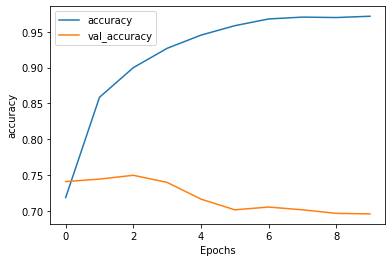

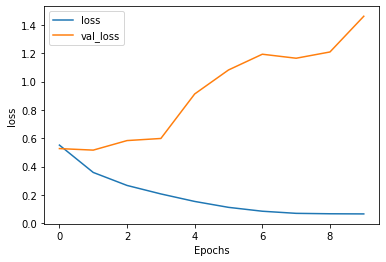

In [93]:
##VIEWING MODEL PERFORMANCE
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])         
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [94]:
yhat=model.predict(tpadded)

In [95]:
y = pd.DataFrame(data=yhat,columns=["target"]) ## CONVERTING NUMPY ARRAY TO PANDAS DATA FRAME

In [ ]:
y.head()

,target
0,0.066305
1,0.060792
2,0.301776
3,0.144897
4,0.137486


In [96]:
frames=[d['id'],y]
res=pd.concat(frames,axis=1)


In [97]:
res

,id,target
0,0,0.777771
1,2,0.321709
2,3,0.961819
3,9,0.017713
4,11,0.000316
...,...,...
3258,10861,0.997865
3259,10865,0.999288
3260,10868,0.329964
3261,10874,0.000426


In [99]:
for i in res.index:
  if(res['target'][i]>=0.5):   
    res['target'][i]=1
  else:
    res['target'][i]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [100]:
res.to_csv('subm3.csv') ## SUMBITION FILE

In [101]:
res.head()

,id,target
0,0,1.0
1,2,0.0
2,3,1.0
3,9,0.0
4,11,0.0
